# Exploratory data analysis for the titanic data

In [32]:
# imports here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Union

In [3]:
titanic = pd.read_csv('data/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
print(list(titanic.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [15]:
features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

## Description of data columns:
1. Survived: Survived - 0 = No; 1 = Yes
2. Pclass: Ticket Class - 1 = 1st; 2 = 2nd; 3 = 3rd
3. Name: full name of passenger (inclusing titles - Mr., Mrs., Miss, and Ms.)
4. Sex: male or female
5. Age: Age in years
6. SibSp: Number of siblings/spouses aboard the Titanic
7. Parch: Number of parents/children aboard the Titanic
8. Ticket: Ticket number
9. Fare: Passenger fare (how much paid for the cruise)
10. Cabin: Cabin number (titanic had 10 decks/floors - should be correlated with pclass somehow - my note)
11. Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton


### number of rows in train: 891

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Notes of mine to examine
1. Titanic sank at night (2:20 a.m.) which means probably a lot of passengers were in their cabins, which gives upper decks/floors advantage in surviving - strong relation to cabin and pclass.
2. Most of passengers didn't survive, usually priority in evacuation is given to elders, children and women - could be of use
3. Internet says it took 160 minutes (2 hours and 40 minutes) the Titanic to sink - if priority was given then elders, children and women were saved widely.

In [7]:
num_passengers = len(titanic)
num_survived = len(titanic[titanic['Survived'] == 1])
survived_pct = num_survived / num_passengers
print(f"Total number of passengers={num_passengers}, survived={num_survived}, survived percentage={survived_pct:.3f}")

Total number of passengers=891, survived=342, survived percentage=0.384


### Generic statistics on the dataset

In [11]:
titanic.describe().applymap(lambda x: f"{x:0.3f}")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [30]:
print("Missig values count and percent for each feature")
total = titanic.isnull().sum().sort_values(ascending=False)
percent = (titanic.isnull().sum() / titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Missig values count and percent for each feature


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# Examining each feature statistics

### Categorical graphs functions

In [52]:
# Pie
def make_autopct(values):
    # custom function of printing in the pie chart
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

def pie_chart(df: pd.DataFrame, feature: str, categories: Union[List[str], List[int]]) -> None:
    # plotting counts and percentages of each category
    counts_per_category = [df[df[feature] == category].count()[feature] for category in categories]
    # Creating plot
    fig = plt.figure(figsize =(8, 5))
    plt.pie(counts_per_category, labels=categories, autopct=make_autopct(counts_per_category), textprops={'fontsize': 14})
    plt.suptitle(feature, fontsize=18);

In [ ]:
def create_df_for_numeric_cateforical(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    # using PassengerId because it has no missing values
    count_per_value = titanic[['PassengerId', feature]].groupby(feature).count()
    count_per_value.rename(columns={'PassengerId': 'Count'}, inplace=True)
    count_per_value['Percent'] = count_per_value['Count'] / count_per_value['Count'].sum()
    return count_per_value

### Continous graphs functions

In [ ]:
# Histogram
def hist_and_kde(df: pd.DataFrame, feature: str) -> None:
    # data distribution of feature and kernel density estimation of it
    sns.histplot(df[feature].dropna(), kde=True, bins=30, stat="density", linewidth=0)
    plt.title('Histogram of ' + str(feature))
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show();

In [ ]:
# Boxplot
def boxplot_and_outliers(df: pd.DataFrame, feature: str) -> None:
    # data distribution and outliers identifying using boxplot
    figure, ax = plt.subplots(figsize=(7, 6))
    sns.boxplot(x=feature, data=df).set_title(f'{feature} Boxplot', fontsize=16);
    ax.set_xlabel(feature, fontdict={'fontsize': 14})
    ax.set_ylabel('distribution', {'fontsize': 14});
    
    # boxplot outliers definition - for calculating dropping nans is required
    Q1 = np.percentile(df[feature].dropna().values, 25)  # Q1
    Q3 = np.percentile(df[feature].dropna().values, 75)  # Q3
    IQR = Q3 - Q1  # interquartile range
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    print(f'The interquartile range: [{Q1}, {Q3}]')
    print(f'The outliers\' bounds are: lower bound={lower_whisker:.3f}, upper bound={upper_whisker:.3f}')

## Pclass

In [ ]:
pie_chart(titanic, feature='Pclass', categories=[1, 2, 3])

###### Pclass explained:
As we seen from a cell above we do not have any missing data on the Pclass attribute.

We can see that there is an imbalance in the partition according to Pclass and more than half of the passengers are of the 3rd (lowes "socio-economic status" class), the rest of the passengers divide pretty evenly between the firt two classes (a slight diffierence of approximately 20 passengers - about 4%).

## Name

In [ ]:
# come back later

## Sex

In [ ]:
pie_chart(titanic, feature='Sex', categories=["male", "female"])

###### Sex explained:
As we seen from a cell above we do not have any missing data on the Sex attribute.

We can see that there is an imbalance in the partition according to Sex and the data is biased to the male category, meaning most of the passengers are males.

## Age

In [ ]:
hist_and_kde(titanic, 'Age')

In [ ]:
boxplot_and_outliers(titanic, 'Age')

In [ ]:
titanic['Age'].describe()  # describe knows how to handle nans

###### Age explained:
As we seen from a cell above we have about 20% of missing data on the Age attribute.

We define outliers as people with Age higher than the upper whisker bound (upper bound=64.812), and lower than the lower whisker (lower bound=-6.688) which isn't physibily so we won't have any in the lower bound since Age is non-negative. From the boxplot we can see that there aren’t any outliers in the lower side of Age (as expected), and in the upper side of Age there are some outliers. The histogram shows that the majority of people is in the Age range of 20.125-38.0 (our whiskers range).
It seems that the Age distribution is quite symmetrical (given the lower bound of 0), around the mean value of 29.69. However, we have more points in the right tail than the left tail (more outliers from the upper bound than from the lower bound).

## SibSp

In [ ]:
count_per_sibsp = create_df_for_numeric_cateforical(titanic, 'SibSp')
count_per_sibsp

In [ ]:
boxplot_and_outliers(titanic, 'SibSp')

###### SibSp explained:
As we seen from a cell above we do not have any missing data on the SibSp attribute.

## Parch

In [ ]:
count_per_parch = create_df_for_numeric_cateforical(titanic, 'Parch')
count_per_parch

In [ ]:
boxplot_and_outliers(titanic, 'Parch')

###### Parch explained:
As we seen from a cell above we do not have any missing data on the Parch attribute.

## Fare

In [ ]:
hist_and_kde(titanic, 'Fare')

In [ ]:
boxplot_and_outliers(titanic, 'Fare')

In [ ]:
titanic['Fare'].describe()  # describe knows how to handle nans

## Embarked

In [ ]:
pie_chart(titanic, feature='Embarked', categories=['C', 'Q', 'S'])

The interquartile range: [0.0, 1.0]
The outliers' bounds are: lower bound=-1.500, upper bound=2.500


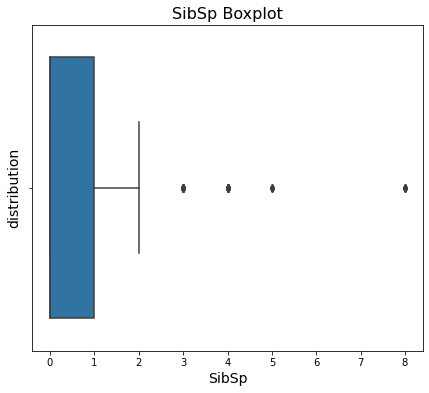

In [102]:
boxplot_and_outliers(titanic, 'SibSp')

###### SibSp explained:
As we seen from a cell above we do not have any missing data on the SibSp attribute.

## Parch

In [107]:
count_per_parch = create_df_for_numeric_cateforical(titanic, 'Parch')
count_per_parch

,Count,Percent
Parch,,
0,678,0.760943
1,118,0.132435
2,80,0.089787
3,5,0.005612
4,4,0.004489
5,5,0.005612
6,1,0.001122


The interquartile range: [0.0, 0.0]
The outliers' bounds are: lower bound=0.000, upper bound=0.000


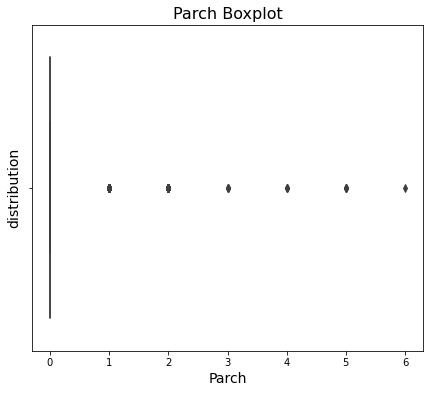

In [108]:
boxplot_and_outliers(titanic, 'Parch')

###### Parch explained:
As we seen from a cell above we do not have any missing data on the Parch attribute.

## Fare

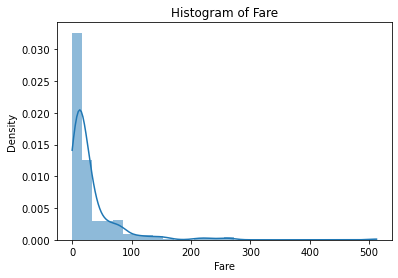

In [109]:
hist_and_kde(titanic, 'Fare')

The interquartile range: [7.9104, 31.0]
The outliers' bounds are: lower bound=-26.724, upper bound=65.634


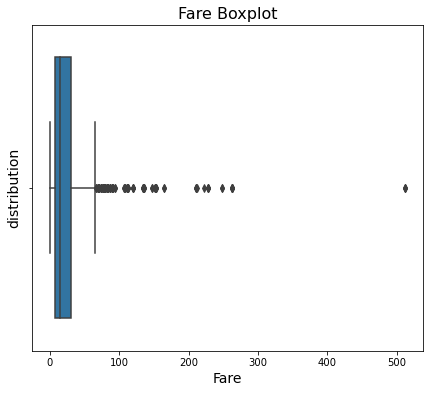

In [110]:
boxplot_and_outliers(titanic, 'Fare')

In [111]:
titanic['Fare'].describe()  # describe knows how to handle nans

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Embarked

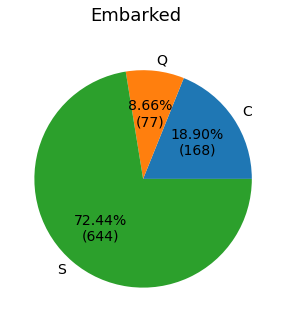

In [112]:
pie_chart(titanic, feature='Embarked', categories=['C', 'Q', 'S'])

#  Examining each feature correlation to Survived target variable